# **PYTORCH FOR ANN DEMO**

In [26]:
import os
os.chdir("/content/drive/MyDrive/Deep_Learning/pytorch")
os.getcwd()

'/content/drive/MyDrive/Deep_Learning/pytorch'

In [27]:
import torch

When we use pytorch we say everything as tensor

In [28]:
a = 10
type(a)

int

its an int and not tensor, only tensor data can access GPU

In [29]:
t1 = torch.tensor(1.0)
print(t1)
print(type(t1))
print(t1.dtype)

tensor(1.)
<class 'torch.Tensor'>
torch.float32


In [30]:
# vector
t2 = torch.tensor([1.,2,3,4])
print(t2)
print(t2.shape)

tensor([1., 2., 3., 4.])
torch.Size([4])


All converted to floating point numbers

In [31]:
# matrix
t3 = torch.tensor([
  [5,6],
  [7,4],
  [2,9]
])
print(t3)
print(t3.shape)

print(15*'-')

t4 = torch.tensor([
    [[11,15,6],[7,34,98]],
    [[1,5,3],[6,44,23]]
])
print(t4)
print(t4.shape)

tensor([[5, 6],
        [7, 4],
        [2, 9]])
torch.Size([3, 2])
---------------
tensor([[[11, 15,  6],
         [ 7, 34, 98]],

        [[ 1,  5,  3],
         [ 6, 44, 23]]])
torch.Size([2, 2, 3])


Size should be same for all rows in a matrix

## Tensor Functions

In [32]:
t6 = torch.full((3,2), 42)
print(t6)

tensor([[42, 42],
        [42, 42],
        [42, 42]])


A 3x2 matrix with all the values equal to 42

In [33]:
t7 = torch.cat((t3,t6))
print(t7)

tensor([[ 5,  6],
        [ 7,  4],
        [ 2,  9],
        [42, 42],
        [42, 42],
        [42, 42]])


Concatanation function, shape of both should be same

In [34]:
t8 = torch.sin(t7)
print(t8)

tensor([[-0.9589, -0.2794],
        [ 0.6570, -0.7568],
        [ 0.9093,  0.4121],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])


every value is passed to a function, sin(value) and output stored in t8

In [35]:
t9 = t8.reshape(3,2,2)
print(t9)

tensor([[[-0.9589, -0.2794],
         [ 0.6570, -0.7568]],

        [[ 0.9093,  0.4121],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])


Converted 2-d matrix to 3-d matrix

In [39]:
# interoperability with numpy
import numpy as np

X = np.array([[1,2],
             [3,4.]])
print(X)
print(type(X))

print(10*'-')

y = torch.from_numpy(X)
print(y)
print(type(y))

print(10*'-')

z = y.numpy()
print(z)
print(type(z))

[[1. 2.]
 [3. 4.]]
<class 'numpy.ndarray'>
----------
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
<class 'torch.Tensor'>
----------
[[1. 2.]
 [3. 4.]]
<class 'numpy.ndarray'>


Converted the numpy matrix to tensor matrix and then tensor matrix back to numpy matrix

# NEURAL NETWORK USING PYTORCH

In [41]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [42]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12045172.96it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205636.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3795672.32it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20067171.93it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [43]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [45]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [46]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [47]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [50]:
train_dataloader

In [53]:
for X,y in train_dataloader:
  print(X)
  print(50*'-')
  print(y)
  print(50*'-')
  print(X.shape)
  print(50*'-')
  print(y.shape)
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [57]:
# define model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),  # in Keras we call Dense, here we call Linear
        #        input   output
        nn.ReLU(),
        nn.Linear(512,512),
        # prev-output  new output
        nn.ReLU(),
        nn.Linear(512, 10)
        # prev-output   final network
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [58]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [61]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"Loss : {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [62]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [63]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Loss : 2.299683  [    0/60000]
Loss : 2.283526  [ 6400/60000]
Loss : 2.256727  [12800/60000]
Loss : 2.248672  [19200/60000]
Loss : 2.253667  [25600/60000]
Loss : 2.205782  [32000/60000]
Loss : 2.222059  [38400/60000]
Loss : 2.185426  [44800/60000]
Loss : 2.186829  [51200/60000]
Loss : 2.151150  [57600/60000]
Test Error: 
 Accuracy: 37.3%, Avg loss: 2.145101 

Epoch 2
-------------------------------
Loss : 2.161203  [    0/60000]
Loss : 2.145642  [ 6400/60000]
Loss : 2.081321  [12800/60000]
Loss : 2.098084  [19200/60000]
Loss : 2.064139  [25600/60000]
Loss : 1.990446  [32000/60000]
Loss : 2.030638  [38400/60000]
Loss : 1.948676  [44800/60000]
Loss : 1.949990  [51200/60000]
Loss : 1.887004  [57600/60000]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.877582 

Epoch 3
-------------------------------
Loss : 1.912929  [    0/60000]
Loss : 1.874112  [ 6400/60000]
Loss : 1.754065  [12800/60000]
Loss : 1.800482  [19200/60000]
Loss : 1.705528  [25600/60000]
L

In [64]:
# save model
torch.save(model.state_dict(), "model.pth")
print("Saved pytorch model state to model.pth")

Saved pytorch model state to model.pth


In [71]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [72]:
# prediction

classes=[
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [73]:
x, y = test_data[0][0], test_data[0][1]

In [74]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [75]:
y

9

In [76]:
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


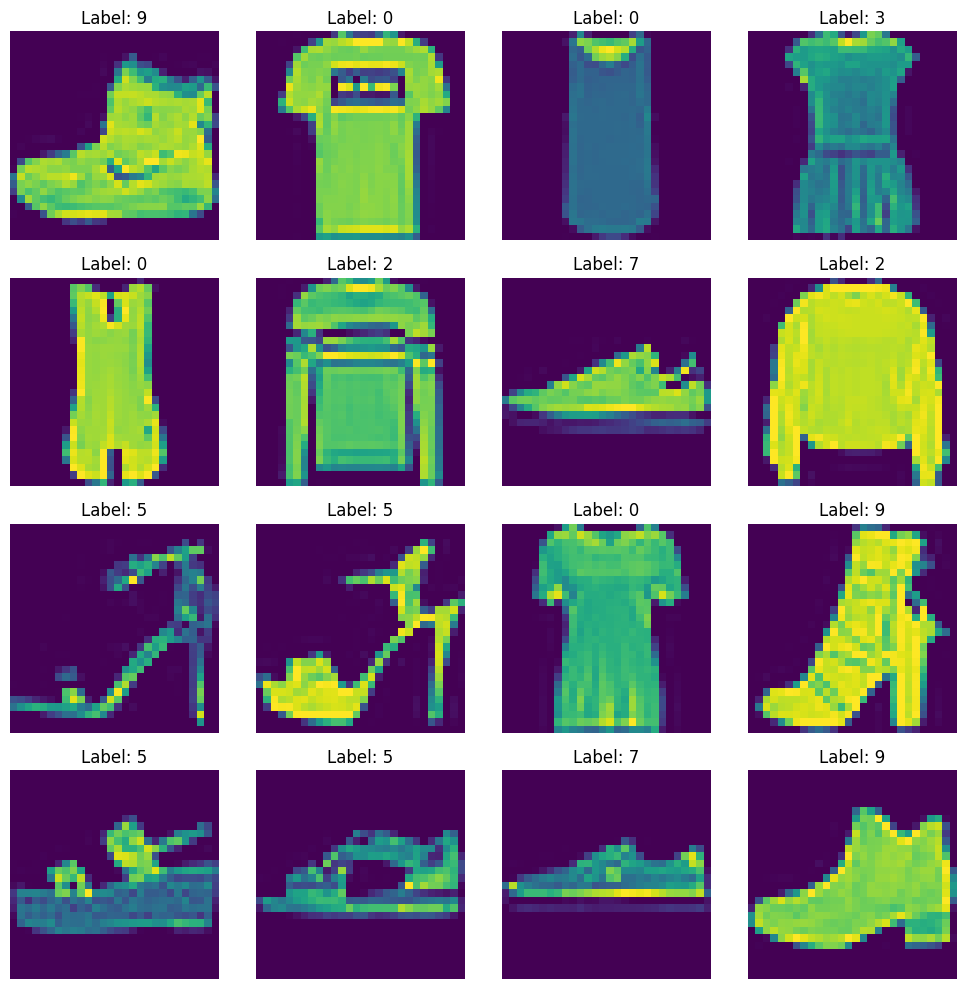

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Loop through the training dataloader to get a batch
for images, labels in train_dataloader:
    break  # Get the first batch and exit loop

# Convert the images to numpy arrays
images = images.numpy()

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()